In [31]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
from skimage.data import shepp_logan_phantom
from skimage.transform import rescale
from skimage.color import rgb2gray

# Was sind die Bilddimensionen

In [36]:
shepp = shepp_logan_phantom()
print(shepp.shape)
print(shepp[100:200,100:200])


(400, 400)
[[0.2        0.2        0.2        ... 0.29803922 0.29803922 0.29803922]
 [0.2        0.2        0.2        ... 0.29803922 0.29803922 0.29803922]
 [0.2        0.2        0.2        ... 0.29803922 0.29803922 0.29803922]
 ...
 [0.2        0.2        0.2        ... 0.2        0.2        0.2       ]
 [0.2        0.2        0.2        ... 0.2        0.2        0.2       ]
 [0.2        0.2        0.2        ... 0.2        0.2        0.2       ]]


In [16]:
shepp?

In [37]:
shepp = shepp_logan_phantom()
shepp = rescale(shepp, scale=0.4, mode='reflect')

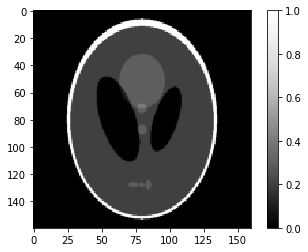

In [38]:
plt.imshow(shepp, cmap=plt.cm.Greys_r, interpolation='none')
plt.colorbar()

# Was passiert, wenn ich interpolation='none' beim imshow befehl weglasse?

https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html

# Beispiel Invertieren

In [20]:
def invertiere_2d_grauwert_bild(bild):
    mx = bild.max()
    return mx - bild

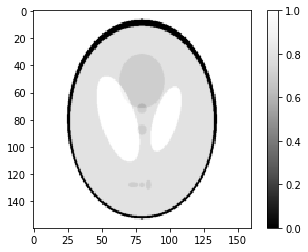

In [39]:
plt.imshow(invertiere_2d_grauwert_bild(shepp), cmap=plt.cm.Greys_r, interpolation='none')
plt.colorbar()

In [25]:
waschbaer = scp.misc.face()

In [29]:
print(waschbaer.shape)
print(waschbaer.min())
print(waschbaer.max())

(768, 1024, 3)
0
255


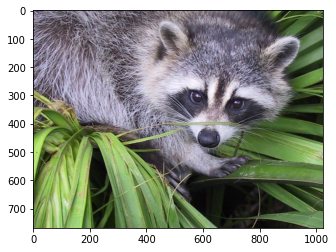

In [30]:
plt.imshow(waschbaer)

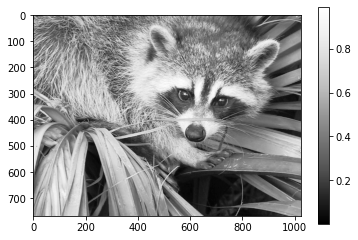

In [35]:
plt.imshow(rgb2gray(waschbaer), cmap=plt.cm.Greys_r)
plt.colorbar()

In [44]:
test = np.array([[1, 2,2, 4],
       [3,2,1,1]])

In [45]:
test?

In [55]:
print(test.flatten())
grau_werte = set(test.flatten())
print(grau_werte)

[1 2 2 4 3 2 1 1]
{1, 2, 3, 4}


In [60]:
for i in grau_werte:
    print(i)

1
2
3
4


In [86]:
def zaehle_grauwert(bild, g):
    return len(np.where(bild.flatten() == g)[0])

def histogramm(bild):
    grauwerte = set(bild.flatten())
    hist = {}
    for g in grauwerte:
        hist[g] = zaehle_grauwert(bild, g)
    
    return hist

def uint8_histogramm(histogramm):
    h = np.zeros(256)
    keys = histogramm.keys()
    for index in range(0,len(h)):
        if index in keys:
            h[index] = histogramm[index]
    return h
        
        

In [87]:
w = rgb2gray(waschbaer)
print(w.min(), w.max())
w = np.round(w*255)
print(w.min(), w.max())

0.0008333333333333333 0.9915835294117648
0.0 253.0


In [106]:
h = histogramm(w)
eta = np.sum(w.flatten())/w.size
print(eta)

115.10510762532552


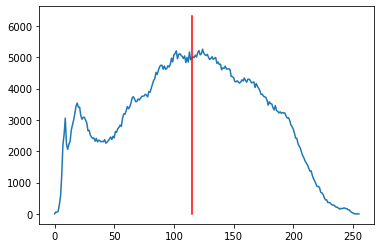

In [110]:
histo_data = uint8_histogramm(h)
plt.plot(histo_data)
plt.plot([eta,eta],[histo_data.min(), 1.2*histo_data.max()],'r-')

In [102]:
counts, bins = np.histogram(w,bins=256)

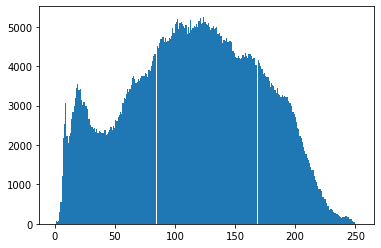

In [103]:
_ = plt.hist(bins[:-1], bins, weights=counts)

# Filter

In [112]:
bright_square = np.zeros((7, 7), dtype=float)
bright_square[2:5, 2:5] = 1
print(bright_square)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


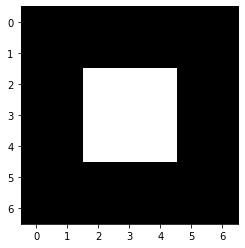

In [114]:
plt.imshow(bright_square, cmap=plt.cm.Greys_r);

In [116]:
mean_kernel = np.full((3, 3), 1/9)
print(mean_kernel)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [118]:
bright_square_filtered = scp.ndimage.correlate(bright_square, mean_kernel)

In [119]:
%precision 2
print(bright_square)
print(bright_square_filtered)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.11 0.22 0.33 0.22 0.11 0.  ]
 [0.   0.22 0.44 0.67 0.44 0.22 0.  ]
 [0.   0.33 0.67 1.   0.67 0.33 0.  ]
 [0.   0.22 0.44 0.67 0.44 0.22 0.  ]
 [0.   0.11 0.22 0.33 0.22 0.11 0.  ]
 [0.   0.   0.   0.   0.   0.   0.  ]]


# Demo von 
https://scikit-image.org/skimage-tutorials/lectures/1_image_filters.html#local-filtering-of-images

In [121]:
mean_filter_interactive_demo(bright_square)

interactive(children=(IntSlider(value=0, description='i_step', max=48), Output()), _dom_classes=('widget-inter…

In [139]:
sy = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
sx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
print(sy)
print(sx)

[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


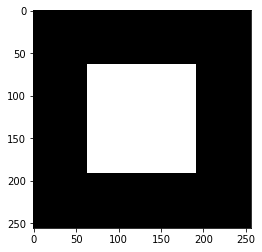

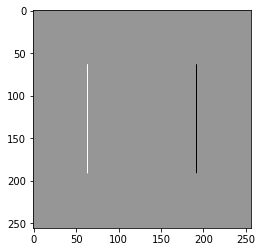

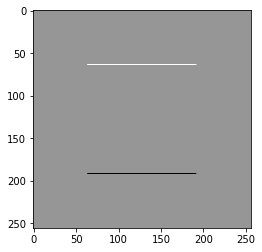

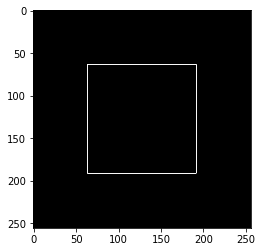

In [149]:
N = 256
sqre = np.zeros((N,N))
sqre[N//4:N//4+N//2,N//4:N//4+N//2] = 1.
kx = scp.ndimage.correlate(sqre, sx)
ky = scp.ndimage.correlate(sqre, sy)
plt.imshow(sqre,cmap=plt.cm.Greys_r,interpolation='none')
plt.figure()
plt.imshow(kx,cmap=plt.cm.Greys_r,interpolation='none')
plt.figure()
plt.imshow(ky,cmap=plt.cm.Greys_r,interpolation='none')
plt.figure()
plt.imshow(np.sqrt(kx**2+ky**2),cmap=plt.cm.Greys_r,interpolation='none')


In [131]:
print(w.shape)
print(sx.shape)

(768, 1024)
(3, 3)


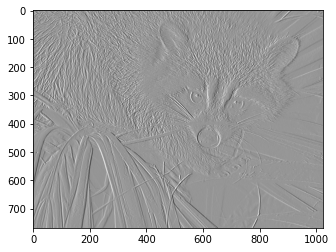

In [141]:
kx = scp.ndimage.correlate(w, sx)
plt.imshow(kx,cmap=plt.cm.Greys_r)

(768, 1024)
(3, 3)
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


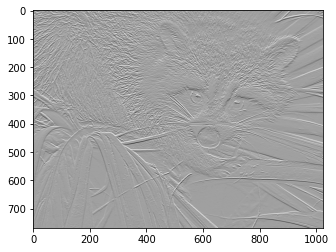

In [142]:
print(w.shape)
print(sy.shape)
print(sy)
ky = scp.ndimage.correlate(w, sy)
plt.imshow(ky,cmap=plt.cm.Greys_r)

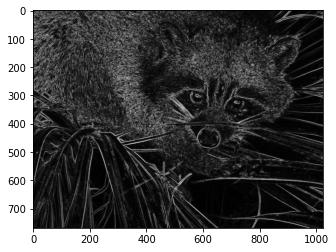

In [143]:
plt.imshow(np.sqrt(ky**2+kx**2),cmap=plt.cm.Greys_r)